# Lab | Imbalanced data
We'll be using the customer_churn.csv to predict the churn

In [86]:
#!pip install imblearn --user

In [8]:
import pymysql
from imblearn.over_sampling import SMOTE
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()

import warnings
warnings.filterwarnings('ignore')

········


### 1. Load the dataset and explore the variables.

In [82]:
df = pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [83]:
data = df.drop(['customerID', 'gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges'], axis=1)

data

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


### Check the data

In [84]:
data.shape

(7043, 4)

In [85]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')

In [86]:
data.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

In [87]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [88]:
data.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64

### 3. Extract the target variable.

In [89]:
y = data['Churn']

### 4. Extract the independent variables and scale them.

In [90]:
X = data.drop('Churn', axis=1)

### 5. Build the logistic regression model

In [91]:
data['SeniorCitizen'].value_counts() 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [92]:
# treating SeniorCitizen as categorical column. only distinct values (1, 0).
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object') 

In [93]:
data['Churn'].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

In [94]:
data['tenure'].value_counts() 

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [95]:
data['MonthlyCharges'].value_counts() 

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [96]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

No     5174
Yes    1869
Name: Churn, dtype: int64 



### EDA

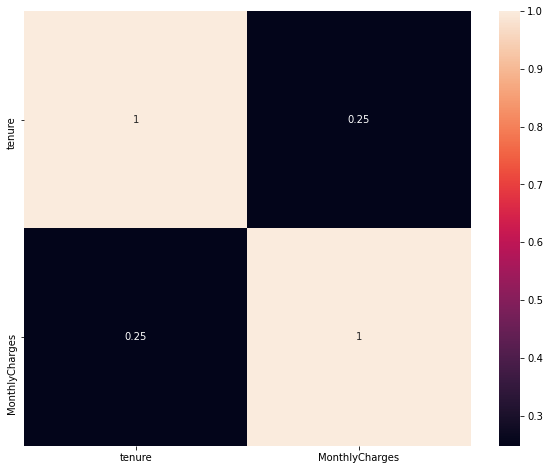

In [97]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

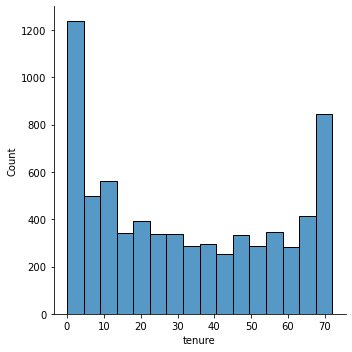

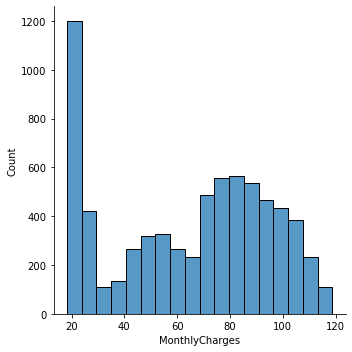

In [98]:
for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

### Boxcox transformation

In [99]:
from scipy import stats

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

df, _ci = boxcox_transform(data)
df

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,0.000000,23.578295,No
1,0,8.796285,43.571734,No
2,0,0.815814,41.332735,Yes
3,0,10.300457,32.892530,No
4,0,0.815814,53.391036,Yes
...,...,...,...,...
7038,0,7.177193,63.300009,No
7039,0,13.299215,76.033726,No
7040,0,4.364654,23.388387,No
7041,1,1.936485,56.005603,Yes


In [100]:
df = pd.get_dummies(df)
df

,tenure,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1,Churn_No,Churn_Yes
0,0.000000,23.578295,1,0,1,0
1,8.796285,43.571734,1,0,1,0
2,0.815814,41.332735,1,0,0,1
3,10.300457,32.892530,1,0,1,0
4,0.815814,53.391036,1,0,0,1
...,...,...,...,...,...,...
7038,7.177193,63.300009,1,0,1,0
7039,13.299215,76.033726,1,0,1,0
7040,4.364654,23.388387,1,0,1,0
7041,1.936485,56.005603,0,1,0,1


### Build the model

In [101]:
y = df['Churn_Yes']
X = df.drop(['Churn_No', 'Churn_Yes'], axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
classification = LogisticRegression(random_state=42, max_iter=10000)

In [104]:
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [105]:
classification.score(X_test, y_test)

0.8026969481902059

### 6. Evaluate the model.

In [106]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[956,  80],
       [198, 175]], dtype=int64)

<AxesSubplot:>

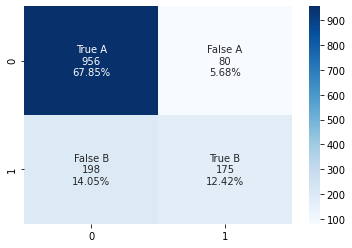

In [107]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 
               'False B', 'True B',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

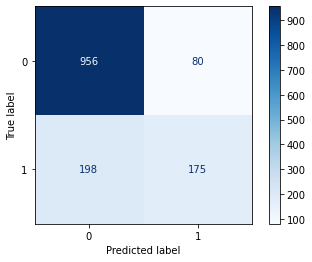

In [108]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()

In [109]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



### 7. Even a simple model will give us more than 70% accuracy. Why?

The accuracy in my model is 0,80. But the accuracy alone is not a good evaluation option, when we deal with class-imbalanced data sets.In this simple model I could guess if there is a Churn_No 0,1 and will also get an very good result, because the data is not balanced and the chance for a No is three times higher: 

In [110]:
df['Churn_No'].value_counts() 

1    5174
0    1869
Name: Churn_No, dtype: int64

"A model trained on imbalanced classes will learn the proportion of the imbalance and perpetuate it in it's predictions. The problem is that this will frequently bypass the importance of the other features." last class notebook 

Link: https://medium.com/@limavallantin/why-you-should-not-trust-only-in-accuracy-to-measure-machine-learning-performance-a72cf00b4516

### 8. Synthetic Minority Oversampling Technique (SMOTE)

In [111]:
smote = SMOTE()

y = df['Churn_Yes']
X = df.drop(['Churn_No', 'Churn_Yes'], axis=1)

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()


1    5174
0    5174
Name: Churn_Yes, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)
# before SMOTE: 0.8026969481902059

0.7405797101449275

In [113]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)
# before SMOTE:
# array([[956,  80],
#        [198, 175]], dtype=int64)

array([[762, 259],
       [278, 771]], dtype=int64)

<AxesSubplot:>

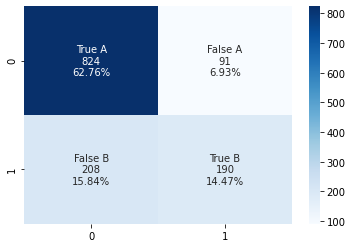

In [79]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 
               'False B', 'True B',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [114]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

# before SMOTE: 
# accuracy = 0.80
# precision weighted acg = 0,79 
# recall weighted acg = 0,80
# f1-score weighted acg = 0,79 

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1021
           1       0.75      0.73      0.74      1049

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



### 9. Tomek links 

In [115]:
from imblearn.under_sampling import TomekLinks

y = df['Churn_Yes']
X = df.drop(['Churn_No', 'Churn_Yes'], axis=1)

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

0    4696
1    1869
Name: Churn_Yes, dtype: int64

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)
classification.score(X_test, y_test)
# with SMOTE:    0.7526570048309179
# before Tomked: 0.8026969481902059

0.7722772277227723

In [117]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

# with SMOTE: 
# array([[767, 254],
#        [258, 791]], dtype=int64)

# before Tomek:
# array([[956,  80],
#        [198, 175]], dtype=int64)

array([[824,  91],
       [208, 190]], dtype=int64)

<AxesSubplot:>

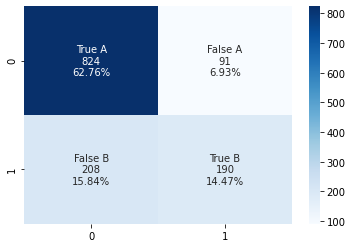

In [118]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 
               'False B', 'True B',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [119]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

# with SMOTE: 
# accuracy = 0.75
# precision weighted acg = 0,75 
# recall weighted acg = 0,75
# f1-score weighted acg = 0,75 

# before Tomek: 
# accuracy = 0.80
# precision weighted acg = 0,79 
# recall weighted acg = 0,80
# f1-score weighted acg = 0,79 

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       915
           1       0.68      0.48      0.56       398

    accuracy                           0.77      1313
   macro avg       0.74      0.69      0.70      1313
weighted avg       0.76      0.77      0.76      1313



In [120]:
# the true predicted value is higher and the accuracy after the tokek - in comparison to the SMOTE model. 